___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
from termcolor import cprint
from termcolor import colored
from colorama import Fore, Style 
import colorama
from scipy import stats
#!pip install xgboost==0.90

import warnings
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from xgboost import XGBClassifier
#import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#cf.go_offline()
#To display the plots
%matplotlib inline
# sklearn library for machine learning algorithms, data preprocessing, and evaluation

# yellowbrick library for visualizing the model performance

#!pip install termcolor

# to get rid of the warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


In [2]:
import xgboost as xgb

xgb.__version__


'0.90'

In [3]:
!pip install xgboost==0.90

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [4]:
df_m = pd.read_csv("ANSUR II MALE Public.csv", encoding='ISO-8859-1')
df_m.head()


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [5]:
df_m.shape


(4082, 108)

In [6]:
df_f = pd.read_csv("ANSUR II FEMALE Public.csv")
df_f.head()


,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [7]:
df_f.shape


(1986, 108)

In [8]:
df_f.columns == df_m.columns


array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
df_f.rename(columns={'SubjectId': 'subjectid'}, inplace=True)


In [10]:
df_f.columns == df_m.columns


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
df = pd.concat([df_f, df_m], axis=0, ignore_index=True) # ignore_index=True ---> eski index bilgilerini ignore et, 0'dan baslayip sirala
df


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,29442,235,1353,312,216,1263,228,193,384,318,...,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
6064,29443,247,1473,336,234,1346,253,196,428,374,...,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
6065,29447,264,1394,313,227,1280,245,193,407,367,...,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
6066,29451,203,1417,327,223,1314,250,196,419,365,...,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand


In [12]:
df.shape


(6068, 108)

## Explore Data

In [13]:
df.head()


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [14]:
df.info()
# cok fazla sütunumuz varsa, df.info bu sekilde gelir. eski format istiyorsak ---> df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
...,...,...,...,...,...,...,...,...
SubjectNumericRace,6068.0,17.515326,550.949948,1.0,1.00,1.0,2.00,42351.0
DODRace,6068.0,1.615030,0.979156,1.0,1.00,1.0,2.00,8.0
Age,6068.0,29.761206,8.674650,17.0,23.00,28.0,36.00,58.0
Heightin,6068.0,68.257251,3.861954,56.0,66.00,68.0,71.00,94.0


In [18]:
df.isnull().sum().any()


True

In [19]:
df.isnull().sum().sum()


4647

In [20]:
df.isnull().sum()*100 / df.shape[0]


subjectid                         0.0
abdominalextensiondepthsitting    0.0
acromialheight                    0.0
acromionradialelength             0.0
anklecircumference                0.0
                                 ... 
DODRace                           0.0
Age                               0.0
Heightin                          0.0
Weightlbs                         0.0
WritingPreference                 0.0
Length: 108, dtype: float64

In [21]:
df.isnull().sum().sum() *100 /df.shape[0]

76.5820698747528

In [22]:
df.corr()


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
subjectid,1.000000,-0.074702,-0.056287,-0.037505,-0.070446,-0.055057,-0.071510,0.001430,-0.082150,-0.070572,...,-0.149275,-0.044038,-0.066602,-0.101394,-0.037595,0.010501,0.021578,-0.046753,-0.054552,-0.070158
abdominalextensiondepthsitting,-0.074702,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,...,0.579296,0.162457,0.825714,0.550544,0.389220,0.021201,-0.079167,0.380614,0.300027,0.793634
acromialheight,-0.056287,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,...,0.604967,0.933248,0.684610,0.734622,0.922687,-0.002789,-0.235121,0.078582,0.944577,0.702188
acromionradialelength,-0.037505,0.321755,0.872475,1.000000,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,...,0.481149,0.851464,0.603964,0.646149,0.684979,0.011185,-0.201095,0.076888,0.831055,0.620289
anklecircumference,-0.070446,0.524747,0.512417,0.424626,1.000000,0.469964,0.711720,0.569457,0.541868,0.643211,...,0.479788,0.420109,0.745950,0.702178,0.514394,-0.015973,-0.158360,-0.025016,0.499770,0.730350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SubjectNumericRace,0.010501,0.021201,-0.002789,0.011185,-0.015973,-0.001554,-0.010784,-0.009037,-0.011861,-0.004081,...,-0.006050,0.004667,0.017597,-0.016068,-0.000558,1.000000,0.017987,0.033750,-0.001742,0.007052
DODRace,0.021578,-0.079167,-0.235121,-0.201095,-0.158360,-0.229070,-0.108116,-0.113672,-0.124767,-0.066587,...,-0.140695,-0.212210,-0.133350,-0.181502,-0.257819,0.017987,1.000000,0.004738,-0.227227,-0.135988
Age,-0.046753,0.380614,0.078582,0.076888,-0.025016,0.040748,0.077855,0.030007,0.068712,0.217227,...,0.262505,-0.030264,0.228096,0.148806,0.105944,0.033750,0.004738,1.000000,0.031826,0.220190
Heightin,-0.054552,0.300027,0.944577,0.831055,0.499770,0.939310,0.691724,0.797004,0.756733,0.510416,...,0.576376,0.905858,0.636173,0.733900,0.854877,-0.001742,-0.227227,0.031826,1.000000,0.659988


In [23]:
df_object = df.select_dtypes(include="object").head()
df_object


,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,NaN,Right hand
1,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,Mexican,Right hand
2,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,NaN,Right hand
3,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,Caribbean Islander,Right hand
4,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,NaN,Right hand


In [24]:
for col in df_object:
    print(f"{col:<20}:", df[col].nunique())


Gender              : 2
Date                : 253
Installation        : 12
Component           : 3
Branch              : 3
PrimaryMOS          : 285
SubjectsBirthLocation: 152
Ethnicity           : 209
WritingPreference   : 3


In [25]:
df_numeric = df.select_dtypes(include="number")
df_numeric


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,10037,231,1282,301,204,1180,222,177,373,315,...,345,942,657,152,756,2,2,26,61,142
1,10038,194,1379,320,207,1292,225,178,372,272,...,329,1032,534,155,815,3,3,21,64,120
2,10042,183,1369,329,233,1271,237,196,397,300,...,367,1035,663,162,799,1,1,23,68,147
3,10043,261,1356,306,214,1250,240,188,384,364,...,371,999,782,173,818,8,2,22,66,175
4,10051,309,1303,308,214,1210,217,182,378,320,...,380,911,886,152,762,1,1,45,63,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,29442,235,1353,312,216,1263,228,193,384,318,...,347,1016,675,163,778,51,1,22,67,160
6064,29443,247,1473,336,234,1346,253,196,428,374,...,385,1082,896,178,873,1,1,22,71,194
6065,29447,264,1394,313,227,1280,245,193,407,367,...,353,1011,832,178,822,1,1,23,67,186
6066,29451,203,1417,327,223,1314,250,196,419,365,...,350,1062,731,172,837,1,1,22,69,165


DODRace Column:

In [26]:
df.DODRace.value_counts(dropna=False)


1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [27]:
df.drop(df[(df['DODRace'] > 3)].index, inplace=True)


In [28]:
df.DODRace.value_counts(dropna=False)


1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [29]:
df["DODRace"] = df.DODRace.map({1: "White", 2: "Black", 3: "Hispanic"})
df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,Black,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,Hispanic,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,White,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,Black,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,White,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,29442,235,1353,312,216,1263,228,193,384,318,...,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,White,22,67,160,Right hand
5765,29443,247,1473,336,234,1346,253,196,428,374,...,Combat Arms,91B,Oklahoma,1,NaN,White,22,71,194,Right hand
5766,29447,264,1394,313,227,1280,245,193,407,367,...,Combat Arms,13B,Oklahoma,1,NaN,White,23,67,186,Right hand
5767,29451,203,1417,327,223,1314,250,196,419,365,...,Combat Arms,13P,Oklahoma,1,NaN,White,22,69,165,Right hand


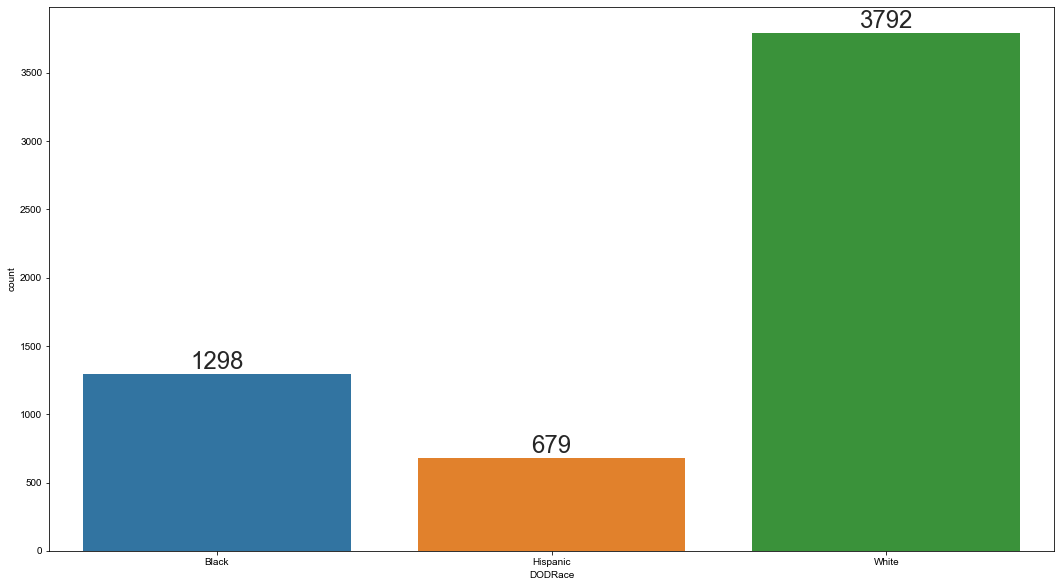

In [32]:
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.countplot(x="DODRace", data=df)
sns.set(font_scale=2)
for container in ax.containers:
    ax.bar_label(container);

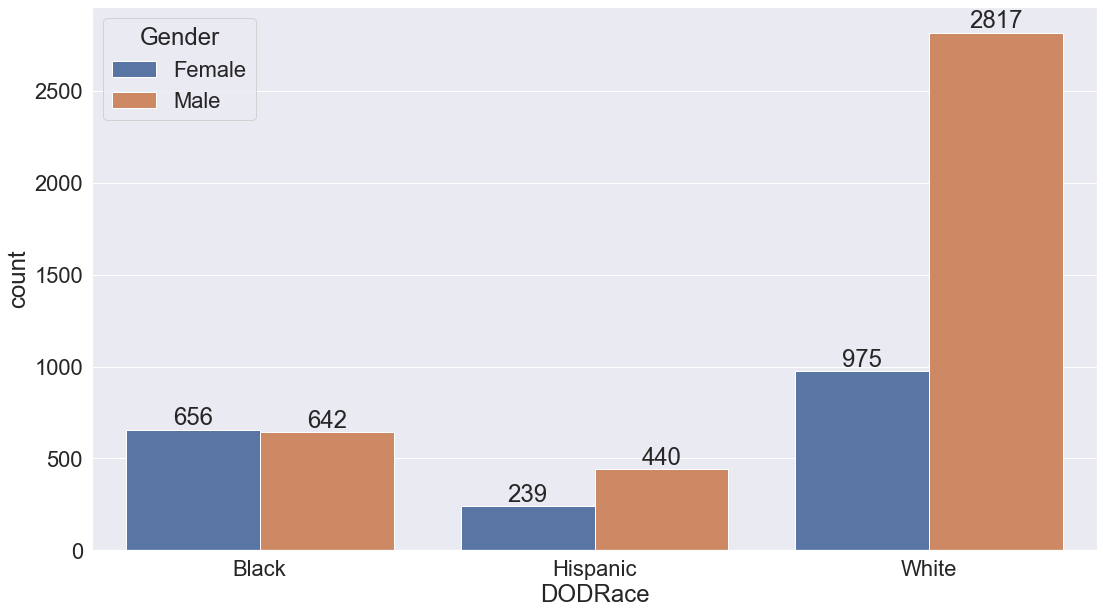

In [33]:
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.countplot(x="DODRace", hue='Gender', data=df)

for container in ax.containers:
    ax.bar_label(container);

In [34]:
df.DODRace.value_counts(normalize=True)

White       0.657306
Black       0.224996
Hispanic    0.117698
Name: DODRace, dtype: float64

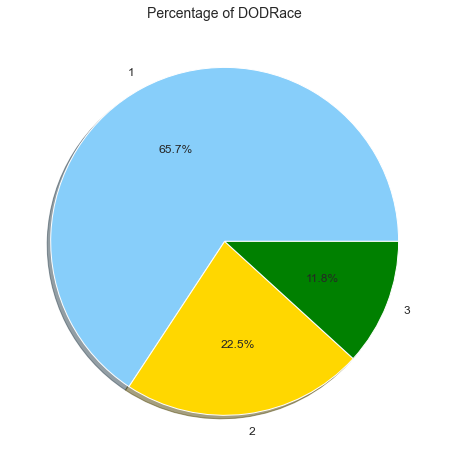

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(x=df.DODRace.value_counts().values,
       labels=['1', '2', '3'],
       autopct='%.1f%%',
       colors=['lightskyblue', 'gold', 'green'],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("Percentage of DODRace", fontdict={'fontsize': 14})
plt.show()


SubjectNumericRace

In [36]:
df.SubjectNumericRace.value_counts()

1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
42          6
62          6
231         6
35          5
235         4
63          3
43          3
218         3
431         2
423         2
2518        2
2351        2
451         1
4           1
238         1
358         1
318         1
651         1
425         1
42351       1
631         1
6           1
428         1
4251        1
Name: SubjectNumericRace, dtype: int64

In [37]:
df.drop(df[(df['SubjectNumericRace'] > 3)].index, inplace=True)

In [38]:
df.SubjectNumericRace.value_counts()

1    3559
2    1025
3     541
Name: SubjectNumericRace, dtype: int64

In [39]:
df.DODRace.value_counts()

White       3567
Black       1033
Hispanic     525
Name: DODRace, dtype: int64

In [40]:
df.drop('SubjectNumericRace', axis=1, inplace=True)


Ethnicity

In [41]:
df.Ethnicity.value_counts(dropna=False)

NaN                                  4584
Mexican                               235
Puerto Rican                          140
Dominican                              26
Colombian                              14
Salvadoran                             12
Honduran                                9
Cuban                                   8
Mexican Puerto Rican                    8
Dominican Puerto Rican                  8
Panamanian                              8
Peruvian                                7
Nicaraguan                              6
Ecuadorian                              6
Guatemalan Mexican                      4
Mexican Salvadoran                      4
Cuban Puerto Rican                      4
Chilean Mexican                         3
Guatemalan                              3
Colombian Ecuadorian                    2
Bolivian                                2
Ecuadorian Puerto Rican                 2
Cuban Mexican                           2
Panamanian Puerto Rican           

In [42]:
df.drop('Ethnicity', axis=1, inplace=True)


Gender Column:

In [43]:
df.Gender.value_counts(dropna=False)

Male      3493
Female    1632
Name: Gender, dtype: int64

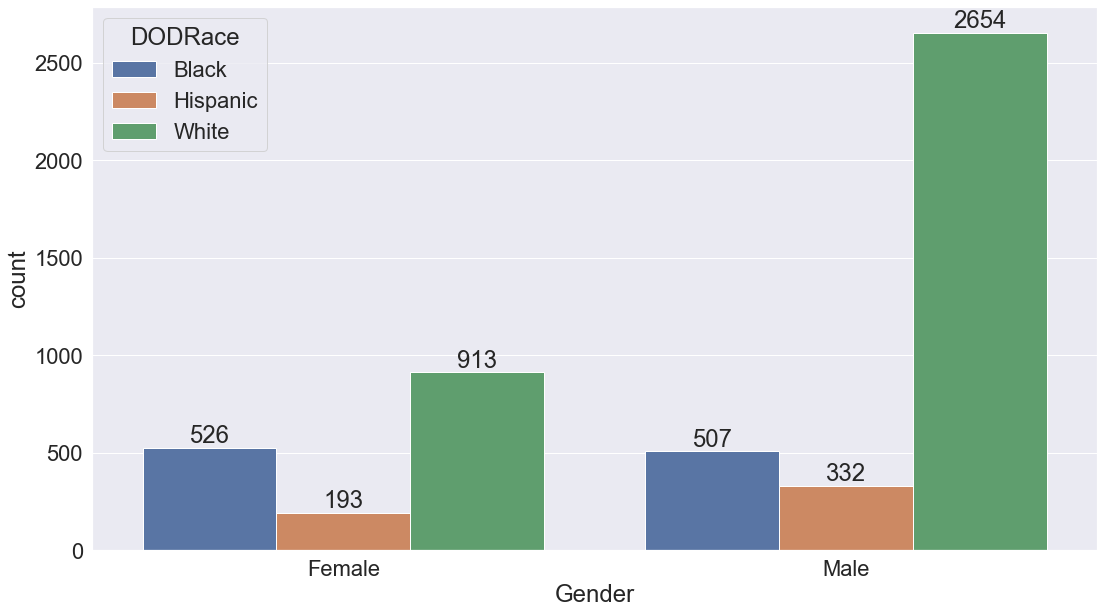

In [44]:
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.countplot(x="Gender", hue='DODRace', data=df)
sns.set(font_scale=2)
for container in ax.containers:
    ax.bar_label(container);

Component

In [45]:
df.Component.value_counts(dropna=False)

Regular Army           2605
Army National Guard    2343
Army Reserve            177
Name: Component, dtype: int64

In [46]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)


Component            DODRace 
Army National Guard  White       0.747332
                     Black       0.174136
                     Hispanic    0.078532
Army Reserve         White       0.581921
                     Black       0.237288
                     Hispanic    0.180791
Regular Army         White       0.657582
                     Black       0.223800
                     Hispanic    0.118618
Name: DODRace, dtype: float64

Branch

In [47]:
df.Branch.value_counts(dropna=False)

Combat Service Support    2693
Combat Arms               1311
Combat Support            1121
Name: Branch, dtype: int64

In [48]:
df.groupby(["Component","Branch"])["DODRace"].value_counts()

Component            Branch                  DODRace 
Army National Guard  Combat Arms             White       582
                                             Black        55
                                             Hispanic     52
                     Combat Service Support  White       869
                                             Black       265
                                             Hispanic    105
                     Combat Support          White       300
                                             Black        88
                                             Hispanic     27
Army Reserve         Combat Arms             White         5
                                             Hispanic      1
                     Combat Service Support  White        72
                                             Hispanic     23
                                             Black        21
                     Combat Support          White        26
                               

In [49]:
drop_list = ["subjectid", "Date", "Installation", "Component", 'Branch', "Weightlbs", "Heightin", "PrimaryMOS"]
df.drop(drop_list, axis=1, inplace=True)


In [50]:
df.select_dtypes(include="object").head()


,Gender,SubjectsBirthLocation,DODRace,WritingPreference
0,Female,Germany,Black,Right hand
1,Female,California,Hispanic,Right hand
2,Female,Texas,White,Right hand
4,Female,Texas,White,Right hand
5,Female,Germany,Black,Left hand


In [51]:
df.shape

(5125, 98)

SubjectsBirthLocation

In [52]:
df.SubjectsBirthLocation.value_counts()


New York       363
California     343
Texas          322
Indiana        253
Illinois       194
              ... 
Turkey           1
South Korea      1
Iceland          1
Serbia           1
Guatemala        1
Name: SubjectsBirthLocation, Length: 114, dtype: int64

In [53]:
df.SubjectsBirthLocation.nunique()


114

WritingPreference

In [54]:
df.WritingPreference.value_counts(dropna=False)

Right hand                     4531
Left hand                       548
Either hand (No preference)      46
Name: WritingPreference, dtype: int64

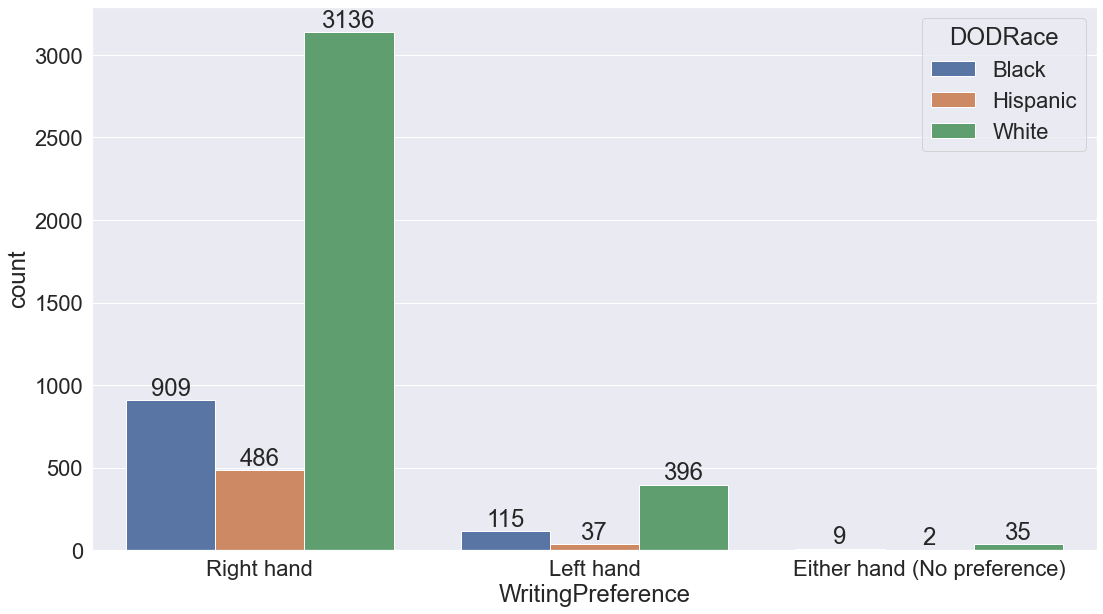

In [55]:
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.countplot(x="WritingPreference", hue='DODRace', data=df)
sns.set(font_scale=2)
for container in ax.containers:
    ax.bar_label(container);

Weightlbs and weightkg columns:

In [56]:
df.weightkg.value_counts(dropna=False)

882     22
791     21
842     20
717     20
809     20
        ..
467      1
1142     1
1109     1
1141     1
1346     1
Name: weightkg, Length: 757, dtype: int64

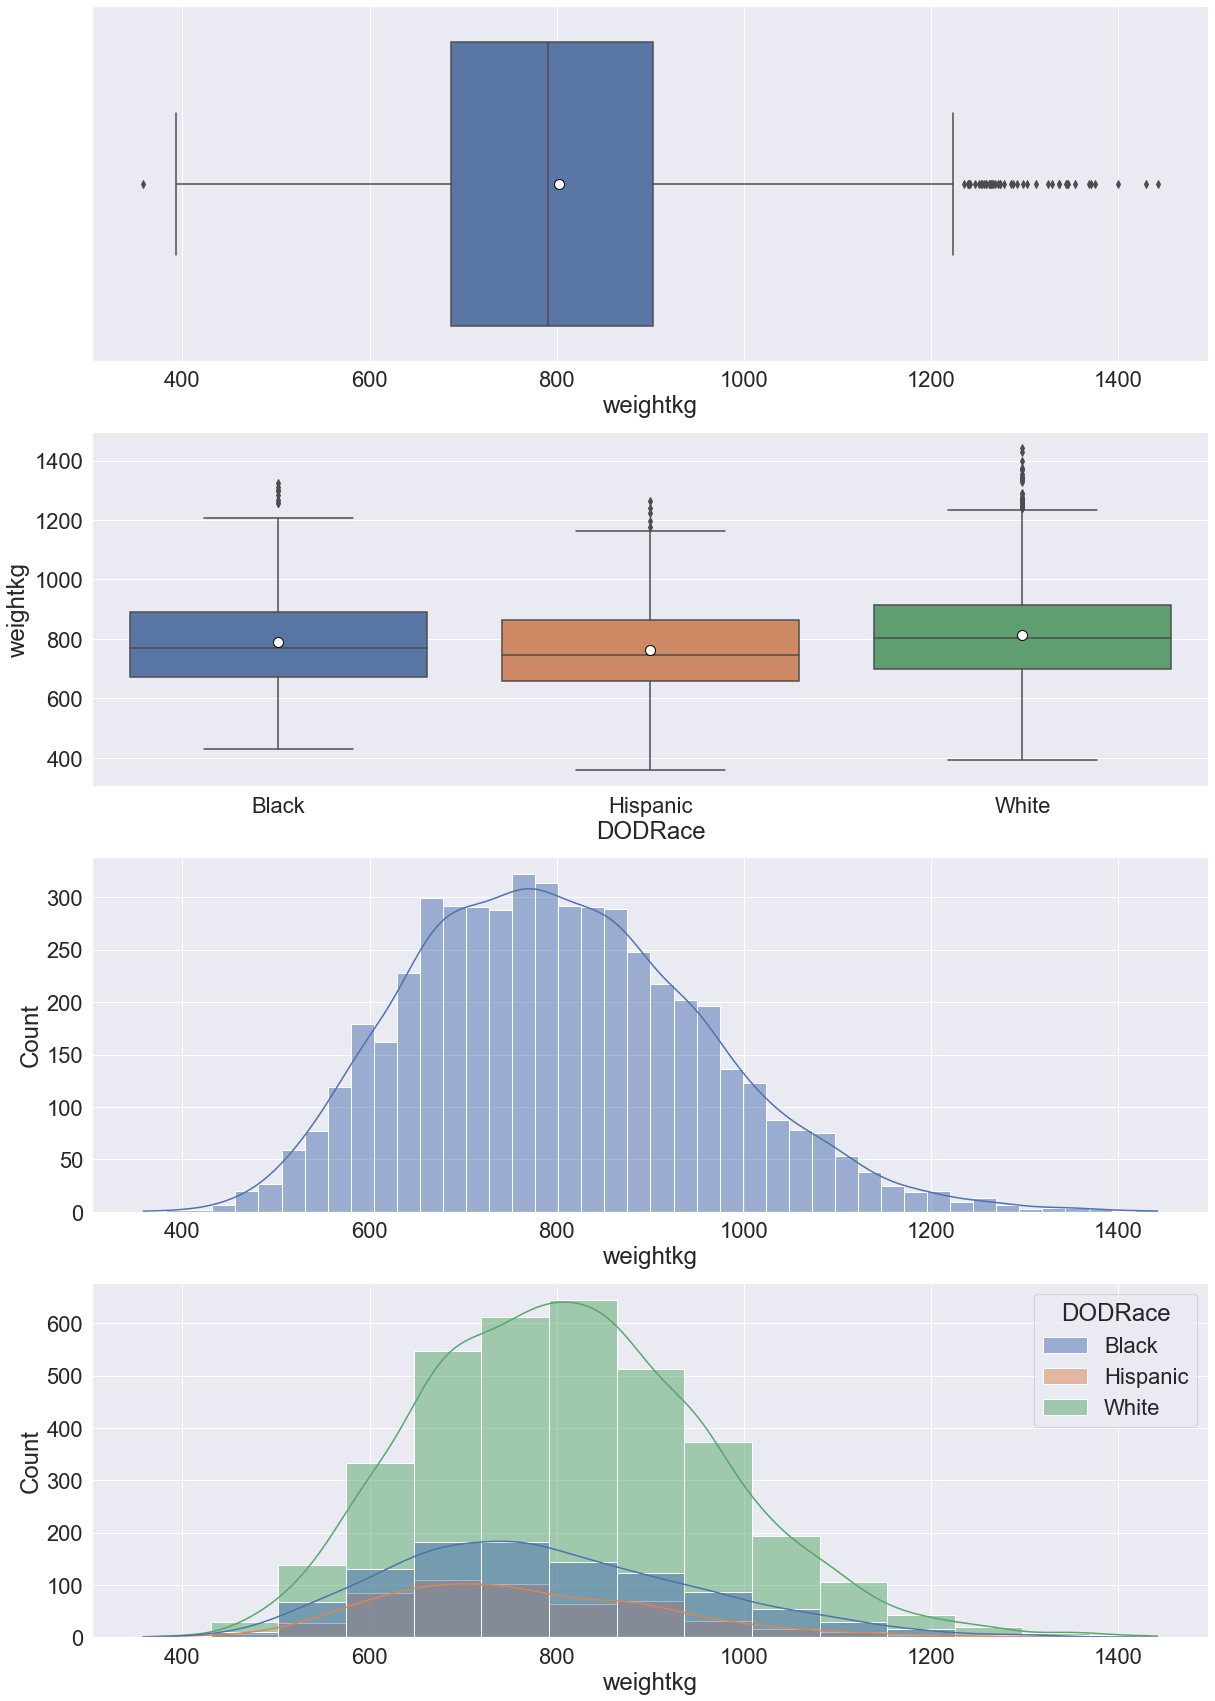

In [57]:
fig, ax = plt.subplots(4, 1, figsize=(20, 30))
sns.boxplot(x='weightkg', data=df, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markeredgecolor": "black",
                       "markersize": "10"}, ax=ax[0])

sns.boxplot(y='weightkg', x='DODRace', data=df, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markeredgecolor": "black",
                       "markersize": "10"}, ax=ax[1])

sns.histplot(x="weightkg", data=df, kde=True, ax=ax[2])

sns.histplot(x="weightkg", data=df, bins=15,
             kde=True, hue='DODRace', ax=ax[3])
plt.show()


321 lbs ---> 145,6 kg and there can not be a value 0 lbs

In [58]:
df = df[df.weightkg > 0]


In [59]:
df.reset_index(drop=True, inplace=True)

In [60]:
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,...,345,942,657,152,756,Female,Germany,Black,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,...,329,1032,534,155,815,Female,California,Hispanic,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,...,367,1035,663,162,799,Female,Texas,White,23,Right hand
3,309,1303,308,214,1210,217,182,378,320,336,...,380,911,886,152,762,Female,Texas,White,45,Right hand
4,272,1428,326,228,1326,229,201,356,342,283,...,367,1053,837,159,844,Female,Germany,Black,44,Left hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120,240,1458,343,231,1344,243,205,394,342,305,...,361,1085,848,178,870,Male,California,White,21,Right hand
5121,247,1473,336,234,1346,253,196,428,374,284,...,385,1082,896,178,873,Male,Oklahoma,White,22,Right hand
5122,264,1394,313,227,1280,245,193,407,367,271,...,353,1011,832,178,822,Male,Oklahoma,White,23,Right hand
5123,203,1417,327,223,1314,250,196,419,365,271,...,350,1062,731,172,837,Male,Oklahoma,White,22,Right hand


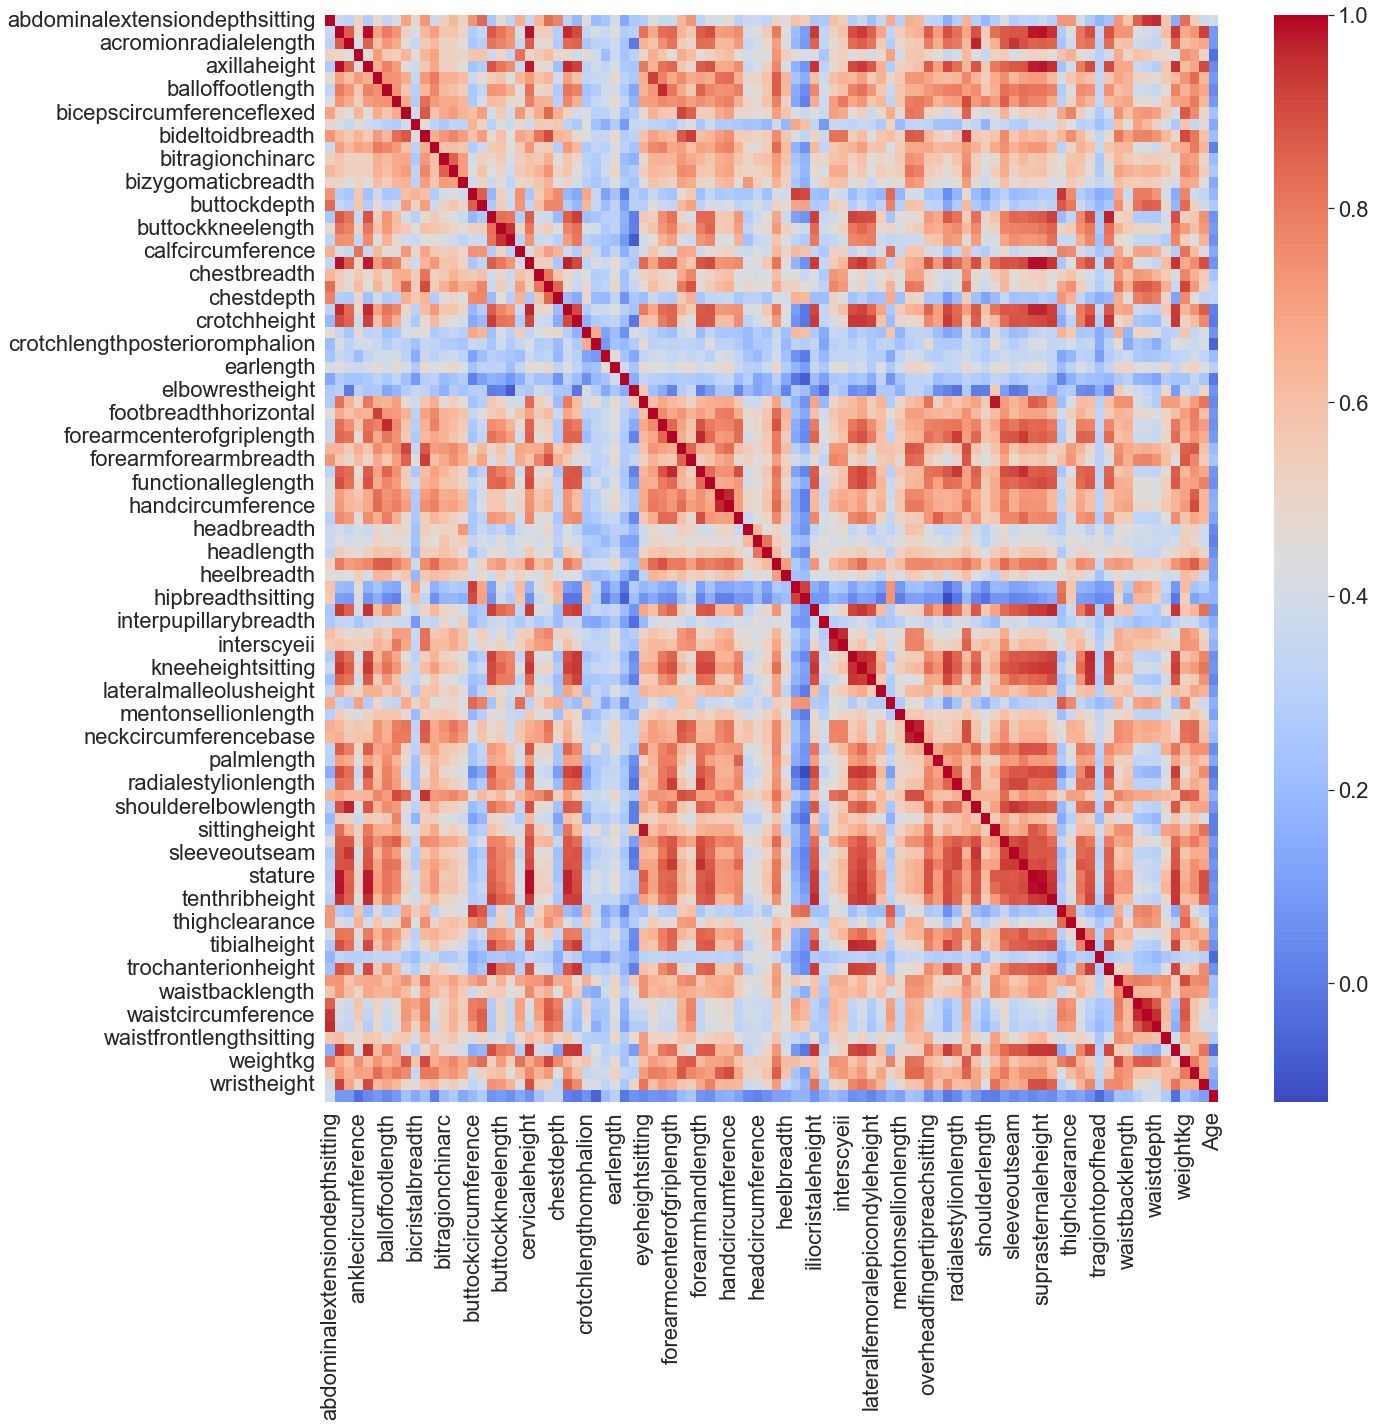

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap="coolwarm");

multicollinearity control

In [62]:
df_numeric.corr()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
subjectid,1.000000,-0.074702,-0.056287,-0.037505,-0.070446,-0.055057,-0.071510,0.001430,-0.082150,-0.070572,...,-0.149275,-0.044038,-0.066602,-0.101394,-0.037595,0.010501,0.021578,-0.046753,-0.054552,-0.070158
abdominalextensiondepthsitting,-0.074702,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,...,0.579296,0.162457,0.825714,0.550544,0.389220,0.021201,-0.079167,0.380614,0.300027,0.793634
acromialheight,-0.056287,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,...,0.604967,0.933248,0.684610,0.734622,0.922687,-0.002789,-0.235121,0.078582,0.944577,0.702188
acromionradialelength,-0.037505,0.321755,0.872475,1.000000,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,...,0.481149,0.851464,0.603964,0.646149,0.684979,0.011185,-0.201095,0.076888,0.831055,0.620289
anklecircumference,-0.070446,0.524747,0.512417,0.424626,1.000000,0.469964,0.711720,0.569457,0.541868,0.643211,...,0.479788,0.420109,0.745950,0.702178,0.514394,-0.015973,-0.158360,-0.025016,0.499770,0.730350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SubjectNumericRace,0.010501,0.021201,-0.002789,0.011185,-0.015973,-0.001554,-0.010784,-0.009037,-0.011861,-0.004081,...,-0.006050,0.004667,0.017597,-0.016068,-0.000558,1.000000,0.017987,0.033750,-0.001742,0.007052
DODRace,0.021578,-0.079167,-0.235121,-0.201095,-0.158360,-0.229070,-0.108116,-0.113672,-0.124767,-0.066587,...,-0.140695,-0.212210,-0.133350,-0.181502,-0.257819,0.017987,1.000000,0.004738,-0.227227,-0.135988
Age,-0.046753,0.380614,0.078582,0.076888,-0.025016,0.040748,0.077855,0.030007,0.068712,0.217227,...,0.262505,-0.030264,0.228096,0.148806,0.105944,0.033750,0.004738,1.000000,0.031826,0.220190
Heightin,-0.054552,0.300027,0.944577,0.831055,0.499770,0.939310,0.691724,0.797004,0.756733,0.510416,...,0.576376,0.905858,0.636173,0.733900,0.854877,-0.001742,-0.227227,0.031826,1.000000,0.659988


In [63]:
def color_red(val):

    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'


pd.DataFrame(df_numeric).corr().style.applymap(color_red)


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
X= df.drop(columns="DODRace")
y= df.DODRace

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=101)


In [67]:
X_train.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
2559,231,1494,352,245,1378,266,200,418,344,277,...,217,414,1084,861,176,882,Male,North Dakota,18,Right hand
172,272,1329,295,210,1228,229,176,358,293,289,...,237,358,944,717,156,825,Female,Illinois,48,Left hand
4385,266,1569,362,247,1453,260,208,395,386,313,...,236,437,1150,1055,180,943,Male,Minnesota,30,Right hand
2143,290,1442,326,240,1319,271,200,431,428,274,...,264,405,1043,1034,188,885,Male,Massachusetts,27,Right hand
1879,288,1520,344,245,1389,263,206,445,389,307,...,273,454,1090,1098,182,895,Male,Texas,26,Right hand


In [68]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (4100, 97)
Train target shape   :  (4100,)
Test features shape  :  (1025, 97)
Test target shape    :  (1025,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [69]:
from sklearn.linear_model import LogisticRegression


In [70]:
cat = X_train.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [71]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=StandardScaler())

Pipeline

In [72]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',
                                                                          random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [73]:
pipe_log_model.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced',
                                    random_state=101))])

In [74]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [75]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[198   5   4]
 [  4  85  16]
 [  9  75 629]]
              precision    recall  f1-score   support

       Black       0.94      0.96      0.95       207
    Hispanic       0.52      0.81      0.63       105
       White       0.97      0.88      0.92       713

    accuracy                           0.89      1025
   macro avg       0.81      0.88      0.83      1025
weighted avg       0.92      0.89      0.90      1025


Train_Set
[[ 804   15    7]
 [   4  387   29]
 [  41  231 2582]]
              precision    recall  f1-score   support

       Black       0.95      0.97      0.96       826
    Hispanic       0.61      0.92      0.74       420
       White       0.99      0.90      0.94      2854

    accuracy                           0.92      4100
   macro avg       0.85      0.93      0.88      4100
weighted avg       0.94      0.92      0.93      4100



model performance

In [76]:
y_pred = pipe_log_model.predict(X_test)
y_pred

array(['Black', 'Hispanic', 'White', ..., 'Hispanic', 'Black', 'White'],
      dtype=object)

In [77]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix


In [78]:
confusion_matrix(y_test,y_pred)

array([[198,   5,   4],
       [  4,  85,  16],
       [  9,  75, 629]], dtype=int64)

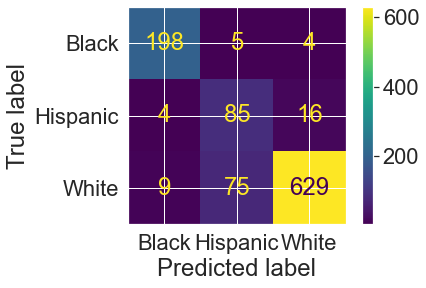

In [79]:
plot_confusion_matrix(pipe_log_model, X_test, y_test);

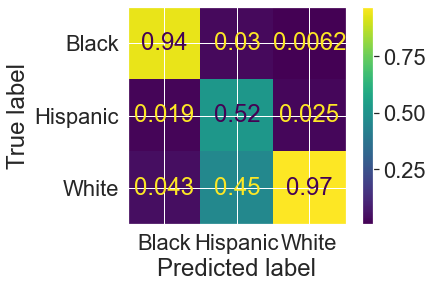

In [80]:
plot_confusion_matrix(pipe_log_model, X_test, y_test, normalize='pred');

In [81]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[198   5   4]
 [  4  85  16]
 [  9  75 629]]
              precision    recall  f1-score   support

       Black       0.94      0.96      0.95       207
    Hispanic       0.52      0.81      0.63       105
       White       0.97      0.88      0.92       713

    accuracy                           0.89      1025
   macro avg       0.81      0.88      0.83      1025
weighted avg       0.92      0.89      0.90      1025


Train_Set
[[ 804   15    7]
 [   4  387   29]
 [  41  231 2582]]
              precision    recall  f1-score   support

       Black       0.95      0.97      0.96       826
    Hispanic       0.61      0.92      0.74       420
       White       0.99      0.90      0.94      2854

    accuracy                           0.92      4100
   macro avg       0.85      0.93      0.88      4100
weighted avg       0.94      0.92      0.93      4100



Cross_val:

In [82]:
scoring = {"precision_hisp" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_hisp" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_hisp" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [83]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_hisp     0.553368
train_precision_hisp    0.623665
test_recall_hisp        0.814286
train_recall_hisp       0.927249
test_f1_hisp            0.657749
train_f1_hisp           0.745715
dtype: float64

### Logistic Model GridsearchCV

In [84]:
recall_hisp =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [85]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [86]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

In [87]:
log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_hisp,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [88]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [89]:
log_model_grid.best_params_

{'log__C': 0.1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [90]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [91]:
log_model_grid.best_index_

3

In [92]:
pd.DataFrame(log_model_grid.cv_results_).loc[3, [
    "mean_test_score", "mean_train_score"]]

mean_test_score     0.819048
mean_train_score    0.884127
Name: 3, dtype: object

In [93]:
log_model_grid.best_score_

0.819047619047619

In [94]:
y_pred = log_model_grid.predict(X_test)
y_pred

array(['White', 'Hispanic', 'White', ..., 'Hispanic', 'Black', 'White'],
      dtype=object)

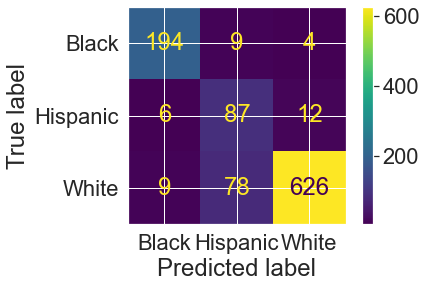

In [95]:
plot_confusion_matrix(log_model_grid, X_test, y_test);

In [96]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test) # ----> log_model_grid scores

Test_Set
[[194   9   4]
 [  6  87  12]
 [  9  78 626]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93       207
    Hispanic       0.50      0.83      0.62       105
       White       0.98      0.88      0.92       713

    accuracy                           0.88      1025
   macro avg       0.80      0.88      0.83      1025
weighted avg       0.92      0.88      0.89      1025


Train_Set
[[ 797   17   12]
 [  12  372   36]
 [  41  267 2546]]
              precision    recall  f1-score   support

       Black       0.94      0.96      0.95       826
    Hispanic       0.57      0.89      0.69       420
       White       0.98      0.89      0.93      2854

    accuracy                           0.91      4100
   macro avg       0.83      0.91      0.86      4100
weighted avg       0.93      0.91      0.91      4100



In [97]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test) # ----> pipe_log_model scores

Test_Set
[[198   5   4]
 [  4  85  16]
 [  9  75 629]]
              precision    recall  f1-score   support

       Black       0.94      0.96      0.95       207
    Hispanic       0.52      0.81      0.63       105
       White       0.97      0.88      0.92       713

    accuracy                           0.89      1025
   macro avg       0.81      0.88      0.83      1025
weighted avg       0.92      0.89      0.90      1025


Train_Set
[[ 804   15    7]
 [   4  387   29]
 [  41  231 2582]]
              precision    recall  f1-score   support

       Black       0.95      0.97      0.96       826
    Hispanic       0.61      0.92      0.74       420
       White       0.99      0.90      0.94      2854

    accuracy                           0.92      4100
   macro avg       0.85      0.93      0.88      4100
weighted avg       0.94      0.92      0.93      4100



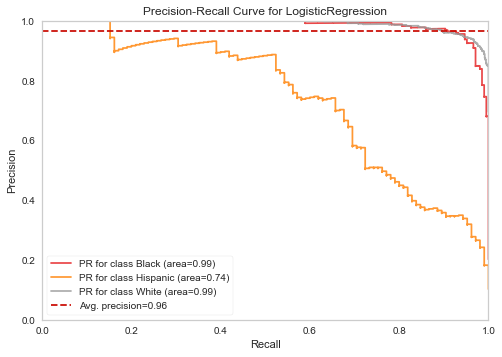

In [98]:
from yellowbrick.classifier import PrecisionRecallCurve
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

modelin hispanic clasini diger iki classtan ayirma basarisi 0.74

In [99]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [100]:
print('Log_reg_AP:', log_AP)
print('Log_reg_F1 score for Hispanic class:', log_f1)
print('Log_reg_Recall score for Hispanic class:', log_recall)

Log_reg_AP: 0.7418859216964815
Log_reg_F1 score for Hispanic class: [0.62365591]
Log_reg_Recall score for Hispanic class: [0.82857143]


## 2. SVC

### Vanilla SVC model 

In [101]:
from sklearn.svm import SVC

In [102]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

svc_pipe_model = Pipeline(steps=operations_svc)

In [103]:
svc_pipe_model.fit(X_train, y_train)

eval_metric(svc_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[198   6   3]
 [ 10  79  16]
 [  9  77 627]]
              precision    recall  f1-score   support

       Black       0.91      0.96      0.93       207
    Hispanic       0.49      0.75      0.59       105
       White       0.97      0.88      0.92       713

    accuracy                           0.88      1025
   macro avg       0.79      0.86      0.82      1025
weighted avg       0.91      0.88      0.89      1025


Train_Set
[[ 808   11    7]
 [  10  390   20]
 [  43  197 2614]]
              precision    recall  f1-score   support

       Black       0.94      0.98      0.96       826
    Hispanic       0.65      0.93      0.77       420
       White       0.99      0.92      0.95      2854

    accuracy                           0.93      4100
   macro avg       0.86      0.94      0.89      4100
weighted avg       0.94      0.93      0.93      4100



In [104]:
scoring = {"precision_hisp" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_hisp" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_hisp" : make_scorer(f1_score, average = None, labels =["Hispanic"])}
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_hisp     0.495700
train_precision_hisp    0.638907
test_recall_hisp        0.695238
train_recall_hisp       0.924074
test_f1_hisp            0.577718
train_f1_hisp           0.755447
dtype: float64

In [105]:
y_pred = svc_pipe_model.predict(X_test)
y_pred

array(['White', 'Hispanic', 'White', ..., 'Hispanic', 'Black', 'White'],
      dtype=object)

###  SVC Model GridsearchCV

In [106]:
param_grid = {
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01]
}

In [107]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_hisp,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)


In [108]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [109]:
svm_model_grid.best_params_


{'svc__C': 1, 'svc__gamma': 'auto'}

In [110]:
svm_model_grid.best_estimator_


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('svc',
                 SVC(C=1, class_weight='balanced', gamma='auto',
                     random_state=101))])

In [111]:
svm_model_grid.best_index_


4

In [112]:
svm_model_grid.best_score_


0.7333333333333334

In [113]:
pd.DataFrame(svm_model_grid.cv_results_).loc[4, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.733333
mean_train_score    0.854497
Name: 4, dtype: object

In [114]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)


Test_Set
[[196  10   1]
 [  9  80  16]
 [ 10  89 614]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93       207
    Hispanic       0.45      0.76      0.56       105
       White       0.97      0.86      0.91       713

    accuracy                           0.87      1025
   macro avg       0.78      0.86      0.80      1025
weighted avg       0.91      0.87      0.88      1025


Train_Set
[[ 797   18   11]
 [  19  357   44]
 [  48  269 2537]]
              precision    recall  f1-score   support

       Black       0.92      0.96      0.94       826
    Hispanic       0.55      0.85      0.67       420
       White       0.98      0.89      0.93      2854

    accuracy                           0.90      4100
   macro avg       0.82      0.90      0.85      4100
weighted avg       0.92      0.90      0.91      4100



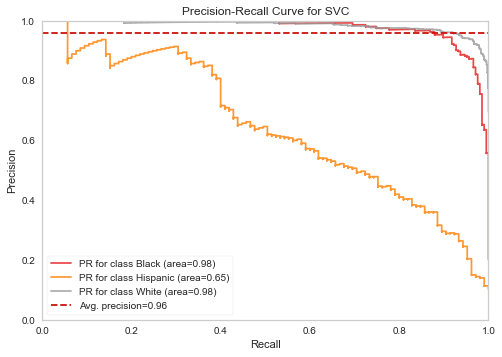

In [115]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [116]:
y_pred = svm_model_grid.predict(X_test)

svc_AP_hisp = viz.score_["Hispanic"]
svc_f1_hisp = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall_hisp = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

print('SVC_AP:', svc_AP_hisp)
print('SVC_F1 score for Hispanic class:', svc_f1_hisp)
print('SVC_Recall score for Hispanic class:', svc_recall_hisp)
print()
print('Log_reg_AP:', log_AP)
print('Log_reg_F1 score for Hispanic class:', log_f1)
print('Log_reg_Recall score for Hispanic class:', log_recall)

SVC_AP: 0.6471788570241477
SVC_F1 score for Hispanic class: [0.56338028]
SVC_Recall score for Hispanic class: [0.76190476]

Log_reg_AP: 0.7418859216964815
Log_reg_F1 score for Hispanic class: [0.62365591]
Log_reg_Recall score for Hispanic class: [0.82857143]


## 3. RF

### Vanilla RF Model

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

rf_pipe_model = Pipeline(steps=operations_rf)

rf_pipe_model.fit(X_train, y_train)


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [118]:
eval_metric(rf_pipe_model, X_train, y_train, X_test, y_test)


Test_Set
[[138   0  69]
 [  9   3  93]
 [  8   2 703]]
              precision    recall  f1-score   support

       Black       0.89      0.67      0.76       207
    Hispanic       0.60      0.03      0.05       105
       White       0.81      0.99      0.89       713

    accuracy                           0.82      1025
   macro avg       0.77      0.56      0.57      1025
weighted avg       0.81      0.82      0.78      1025


Train_Set
[[ 826    0    0]
 [   0  420    0]
 [   0    0 2854]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       826
    Hispanic       1.00      1.00      1.00       420
       White       1.00      1.00      1.00      2854

    accuracy                           1.00      4100
   macro avg       1.00      1.00      1.00      4100
weighted avg       1.00      1.00      1.00      4100



Overfitting!!!

Cross_val

In [119]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring=scoring,
                        cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_precision_hisp     0.676667
train_precision_hisp    1.000000
test_recall_hisp        0.045238
train_recall_hisp       1.000000
test_f1_hisp            0.083643
train_f1_hisp           1.000000
dtype: float64

### RF Model GridsearchCV

In [120]:
param_grid = {'RF_model__n_estimators':[300,400,500], 
             'RF_model__max_depth':[2,3]}

In [121]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations)

In [122]:
rf_grid_model = GridSearchCV(model, param_grid, verbose=3, scoring=recall_hisp, n_jobs=-1, return_train_score=True)

In [123]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [300, 400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [124]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [125]:
rf_grid_model.best_index_

1

In [126]:
rf_grid_model.best_score_

0.6333333333333334

In [127]:
pd.DataFrame(rf_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.633333
mean_train_score    0.669643
Name: 1, dtype: object

In [128]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[131  52  24]
 [  8  64  33]
 [ 59 270 384]]
              precision    recall  f1-score   support

       Black       0.66      0.63      0.65       207
    Hispanic       0.17      0.61      0.26       105
       White       0.87      0.54      0.67       713

    accuracy                           0.56      1025
   macro avg       0.57      0.59      0.52      1025
weighted avg       0.76      0.56      0.62      1025


Train_Set
[[ 571  172   83]
 [  31  284  105]
 [ 207 1014 1633]]
              precision    recall  f1-score   support

       Black       0.71      0.69      0.70       826
    Hispanic       0.19      0.68      0.30       420
       White       0.90      0.57      0.70      2854

    accuracy                           0.61      4100
   macro avg       0.60      0.65      0.57      4100
weighted avg       0.79      0.61      0.66      4100



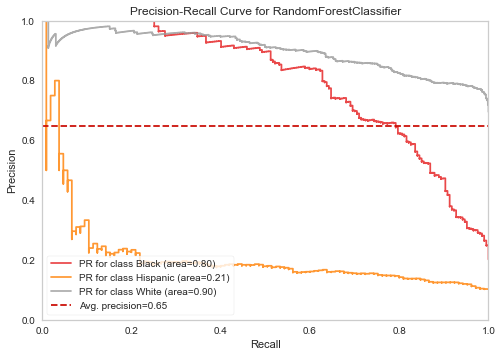

In [129]:
operations= [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [130]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [131]:
print('RF_AP:', rf_AP)
print('RF_F1 score for Hispanic class:', rf_f1)
print('RF_Recall score for Hispanic class:', rf_recall)
print()
print('SVC_AP:', svc_AP_hisp)
print('SVC_F1 score for Hispanic class:', svc_f1_hisp)
print('SVC_Recall score for Hispanic class:', svc_recall_hisp)
print()
print('Log_reg_AP:', log_AP)
print('Log_reg_F1 score for Hispanic class:', log_f1)
print('Log_reg_Recall score for Hispanic class:', log_recall)


RF_AP: 0.21001236131409212
RF_F1 score for Hispanic class: [0.26069246]
RF_Recall score for Hispanic class: [0.60952381]

SVC_AP: 0.6471788570241477
SVC_F1 score for Hispanic class: [0.56338028]
SVC_Recall score for Hispanic class: [0.76190476]

Log_reg_AP: 0.7418859216964815
Log_reg_F1 score for Hispanic class: [0.62365591]
Log_reg_Recall score for Hispanic class: [0.82857143]


## 4. XGBoost

### Vanilla XGBoost Model

In [132]:
#!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb

xgb.__version__



'0.90'

In [133]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [134]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)


Test_Set
[[172   1  34]
 [ 12  25  68]
 [ 11   6 696]]
              precision    recall  f1-score   support

       Black       0.88      0.83      0.86       207
    Hispanic       0.78      0.24      0.36       105
       White       0.87      0.98      0.92       713

    accuracy                           0.87      1025
   macro avg       0.85      0.68      0.71      1025
weighted avg       0.86      0.87      0.85      1025


Train_Set
[[ 759    1   66]
 [  15  214  191]
 [   8    9 2837]]
              precision    recall  f1-score   support

       Black       0.97      0.92      0.94       826
    Hispanic       0.96      0.51      0.66       420
       White       0.92      0.99      0.95      2854

    accuracy                           0.93      4100
   macro avg       0.95      0.81      0.85      4100
weighted avg       0.93      0.93      0.92      4100



In [135]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced', y=y_train)
classes_weights


array([0.47886008, 0.47886008, 0.47886008, ..., 1.65456013, 0.47886008,
       0.47886008])

In [136]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [137]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)


Test_Set
[[183   9  15]
 [ 13  69  23]
 [ 24  92 597]]
              precision    recall  f1-score   support

       Black       0.83      0.88      0.86       207
    Hispanic       0.41      0.66      0.50       105
       White       0.94      0.84      0.89       713

    accuracy                           0.83      1025
   macro avg       0.73      0.79      0.75      1025
weighted avg       0.86      0.83      0.84      1025


Train_Set
[[ 800   12   14]
 [   7  385   28]
 [  75  235 2544]]
              precision    recall  f1-score   support

       Black       0.91      0.97      0.94       826
    Hispanic       0.61      0.92      0.73       420
       White       0.98      0.89      0.94      2854

    accuracy                           0.91      4100
   macro avg       0.83      0.93      0.87      4100
weighted avg       0.93      0.91      0.91      4100



cross_val

In [138]:
operations = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True,
                        fit_params={"XGB_model__sample_weight": classes_weights})
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]


test_precision_hisp     0.477578
train_precision_hisp    0.650095
test_recall_hisp        0.666667
train_recall_hisp       0.937500
test_f1_hisp            0.555562
train_f1_hisp           0.767755
dtype: float64

### XGBoost Model GridsearchCV

In [139]:
param_grid = {"n_estimators":[15, 25],'max_depth':[2,3], "learning_rate": [0.1, 1],
             "subsample":[0.8, 1], "colsample_bytree":[0.8, 1]}

In [140]:
operations = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)


In [141]:
xgb_grid = GridSearchCV(model, param_grid, scoring=recall_hisp,
                        verbose=2, cv=5,  n_jobs=-1, return_train_score=True)


In [142]:
xgb_grid.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)
# bir türlü fit yapamadigim icin bu kismin geri kalanini tamamlayamiyorum.

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
xgb_grid.best_estimator_


In [ ]:
xgb_grid.best_params_


In [ ]:
xgb_grid.best_index_


In [ ]:
pd.DataFrame(xgb_grid.cv_results_).loc[?, [
    "mean_test_score", "mean_train_score"]]


In [ ]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)


In [140]:
#!pip install scikit-plot


In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(colsample_bytree=0.8, learning_rate=0.05,
                                                                                max_depth=2, n_estimators=20, objective='multi:softprob', random_state=101,
                                                                                subsample=0.8))]

model = Pipeline(steps=operations_xgb)


model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show()


In [ ]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])


In [ ]:
y_pred = xgb_grid.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


Compare the Models:

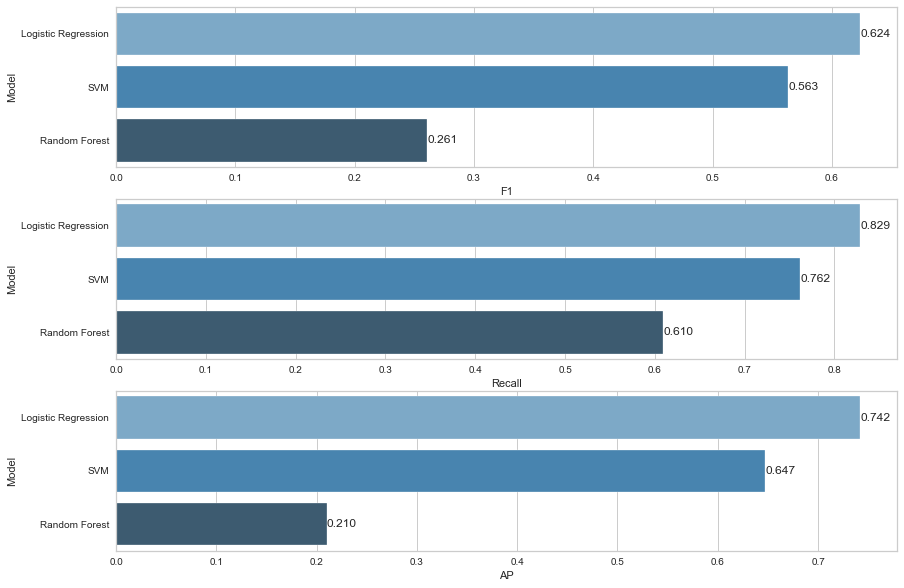

In [142]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest"],
                        "F1": [log_f1[0], svc_f1_hisp[0], rf_f1[0]],
                        "Recall": [log_recall[0], svc_recall_hisp[0], rf_recall[0]],
                        "AP": [log_AP, svc_AP_hisp, rf_AP]})


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show()


---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [141]:
#!pip install imblearn

In [143]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline


In [144]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder=StandardScaler())


In [145]:
X_train_enc = column_trans.fit_transform(X_train)


In [146]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train_enc, y_train)


In [147]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_enc, y_train)


In [150]:
print('Shape of X_over:', X_over.shape)
print()
print('Value count of y_over:')
print(y_over.value_counts())
print()
print('Shape of X_under:', X_under.shape)
print()
print('Value count of y_under:')
print(y_under.value_counts())


Shape of X_over: (8562, 209)

Value count of y_over:
White       2854
Black       2854
Hispanic    2854
Name: DODRace, dtype: int64

Shape of X_under: (1260, 209)

Value count of y_under:
Black       420
Hispanic    420
White       420
Name: DODRace, dtype: int64


In [151]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [152]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_enc, y_train)


In [158]:
print('Value count of y_train:')
print(y_train.value_counts())
print()
print('Value count of resampled y_over:')
print(y_resampled_over.value_counts())


Value count of y_train:
White       2854
Black        826
Hispanic     420
Name: DODRace, dtype: int64

Value count of resampled y_over:
White       2854
Hispanic    1000
Black        826
Name: DODRace, dtype: int64


In [160]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_enc, y_train)


In [161]:
print('Value count of y_train:')
print(y_train.value_counts())
print()
print('Value count of resampled y_under:')
print(y_resampled_under.value_counts())


Value count of y_train:
White       2854
Black        826
Hispanic     420
Name: DODRace, dtype: int64

Value count of resampled y_under:
White       2500
Black        826
Hispanic     420
Name: DODRace, dtype: int64


In [157]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train_enc, y_train)


In [162]:
print('Value count of y_train:')
print(y_train.value_counts())
print()
print('Value count of resampled y:')
print(y_resampled.value_counts())


Value count of y_train:
White       2854
Black        826
Hispanic     420
Name: DODRace, dtype: int64

Value count of resampled y:
White       2500
Hispanic    1000
Black        826
Name: DODRace, dtype: int64


#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [163]:
#!pip install shap

     -------------------------------------- 435.6/435.6 kB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 26.0 MB/s eta 0:00:00


     --------------------------------------- 23.2/23.2 MB 43.5 MB/s eta 0:00:00


In [166]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                            remainder=StandardScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(
    class_weight='balanced', max_iter=10000, random_state=101, penalty="l2", solver='lbfgs')

model_shap.fit(X_train_trans, y_train)


LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101)

In [167]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)


Test_Set
[[199   4   4]
 [  3  86  16]
 [  9  69 635]]
              precision    recall  f1-score   support

       Black       0.94      0.96      0.95       207
    Hispanic       0.54      0.82      0.65       105
       White       0.97      0.89      0.93       713

    accuracy                           0.90      1025
   macro avg       0.82      0.89      0.84      1025
weighted avg       0.92      0.90      0.90      1025


Train_Set
[[ 803   15    8]
 [   5  389   26]
 [  42  223 2589]]
              precision    recall  f1-score   support

       Black       0.94      0.97      0.96       826
    Hispanic       0.62      0.93      0.74       420
       White       0.99      0.91      0.95      2854

    accuracy                           0.92      4100
   macro avg       0.85      0.94      0.88      4100
weighted avg       0.94      0.92      0.93      4100



cross_val:

In [193]:
model = LogisticRegression(class_weight='balanced', max_iter=10000,
                           random_state=101, penalty="l2", solver='lbfgs')

scores = cross_validate(model, X_train_trans, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_precision_hisp     0.553368
train_precision_hisp    0.623553
test_recall_hisp        0.814286
train_recall_hisp       0.927249
test_f1_hisp            0.657749
train_f1_hisp           0.745635
dtype: float64

In [176]:
features = column_trans_shap.get_feature_names_out()
features


array(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__SubjectsBirthLocation_Alabama',
       'onehotencoder__SubjectsBirthLocation_Alaska',
       'onehotencoder__SubjectsBirthLocation_Argentina',
       'onehotencoder__SubjectsBirthLocation_Arizona',
       'onehotencoder__SubjectsBirthLocation_Arkansas',
       'onehotencoder__SubjectsBirthLocation_Azerbaijan',
       'onehotencoder__SubjectsBirthLocation_Belarus',
       'onehotencoder__SubjectsBirthLocation_Belgium',
       'onehotencoder__SubjectsBirthLocation_Belize',
       'onehotencoder__SubjectsBirthLocation_Bolivia',
       'onehotencoder__SubjectsBirthLocation_Bosnia and Herzegovina',
       'onehotencoder__SubjectsBirthLocation_Bulgaria',
       'onehotencoder__SubjectsBirthLocation_California',
       'onehotencoder__SubjectsBirthLocation_Cameroon',
       'onehotencoder__SubjectsBirthLocation_Canada',
       'onehotencoder__SubjectsBirthLocation_Chile',
       'onehotencoder__Subject

In [177]:
new_features = [i.replace("onehotencoder__", "").replace(
    "remainder__", "") for i in features]
new_features


['Gender_Female',
 'Gender_Male',
 'SubjectsBirthLocation_Alabama',
 'SubjectsBirthLocation_Alaska',
 'SubjectsBirthLocation_Argentina',
 'SubjectsBirthLocation_Arizona',
 'SubjectsBirthLocation_Arkansas',
 'SubjectsBirthLocation_Azerbaijan',
 'SubjectsBirthLocation_Belarus',
 'SubjectsBirthLocation_Belgium',
 'SubjectsBirthLocation_Belize',
 'SubjectsBirthLocation_Bolivia',
 'SubjectsBirthLocation_Bosnia and Herzegovina',
 'SubjectsBirthLocation_Bulgaria',
 'SubjectsBirthLocation_California',
 'SubjectsBirthLocation_Cameroon',
 'SubjectsBirthLocation_Canada',
 'SubjectsBirthLocation_Chile',
 'SubjectsBirthLocation_Colombia',
 'SubjectsBirthLocation_Colorado',
 'SubjectsBirthLocation_Connecticut',
 'SubjectsBirthLocation_Costa Rica',
 'SubjectsBirthLocation_Cuba',
 'SubjectsBirthLocation_Delaware',
 'SubjectsBirthLocation_District of Columbia',
 'SubjectsBirthLocation_Dominican Republic',
 'SubjectsBirthLocation_Ecuador',
 'SubjectsBirthLocation_El Salvador',
 'SubjectsBirthLocation_Et

## SHAP for Feature Selection

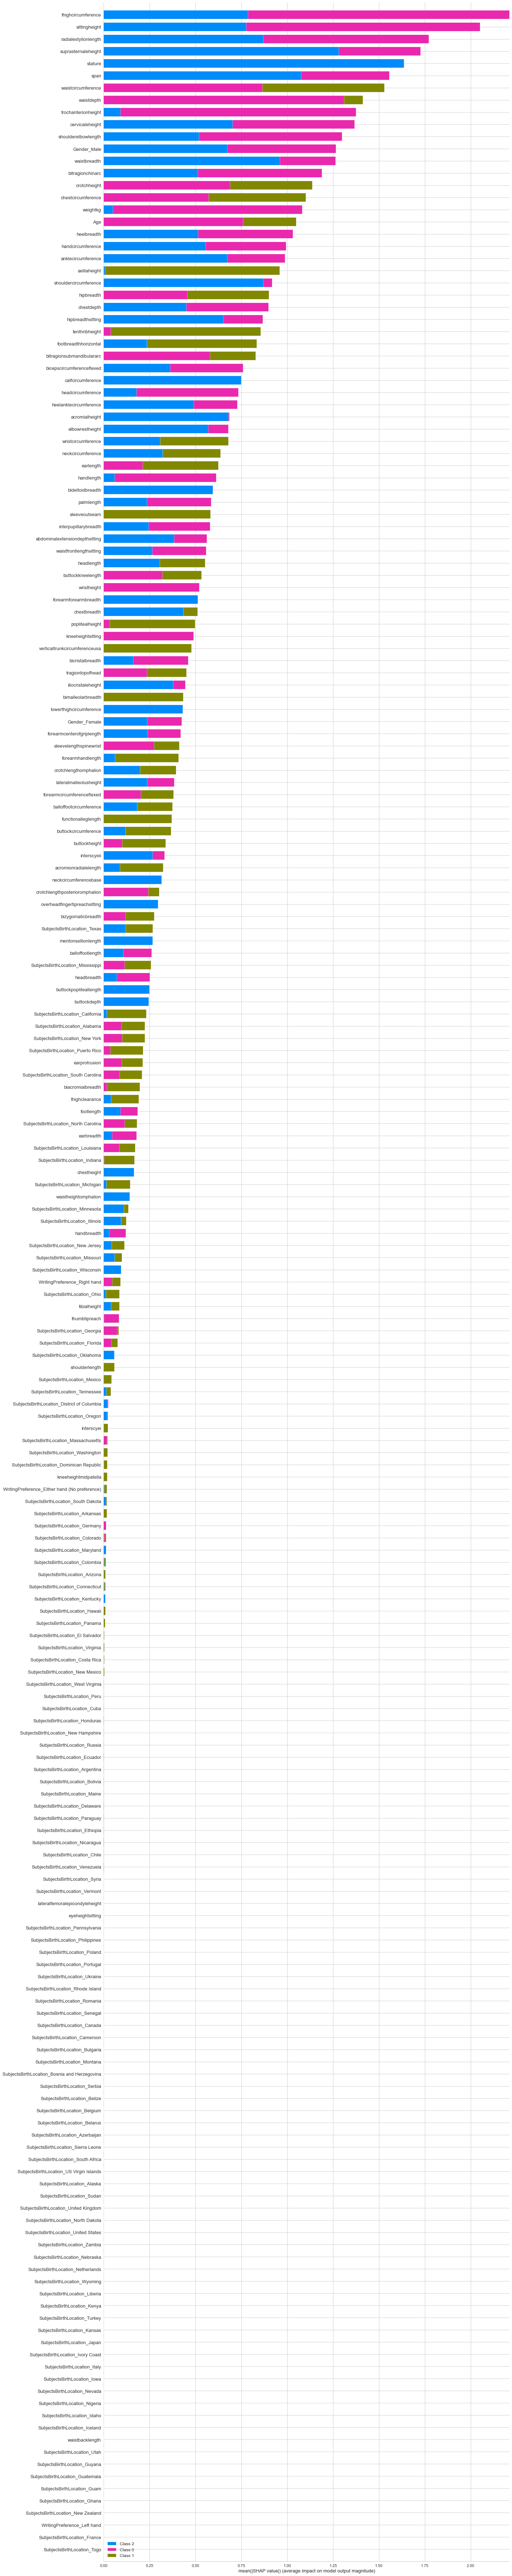

In [179]:
import shap
explainer = shap.Explainer(model_shap, X_train_trans) # feature selection'i yine train seti üzerinde yapiyoruz ki data leakage olmasin

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, max_display=300, feature_names = new_features, plot_size=(20,100))

In [182]:
hispanic = ["SubjectsBirthLocation",  'waistcircumference', 'chestcircumference', 'axillaheight', 'tenthribheight', 'footbreadthhorizontal', 'earlength', 
            "sleeveoutseam", 'poplitealheight', 'verticaltrunkcircumferenceusa', 'forearmhandlength', 'bimalleolarbreadth', 'functionalleglength']


In [184]:
X2 = X[hispanic]
X2.head()

,SubjectsBirthLocation,waistcircumference,chestcircumference,axillaheight,tenthribheight,footbreadthhorizontal,earlength,sleeveoutseam,poplitealheight,verticaltrunkcircumferenceusa,forearmhandlength,bimalleolarbreadth,functionalleglength
0,Germany,850,922,1180,1013,91,65,513,362,1488,432,65,1028
1,California,708,839,1292,1107,91,60,575,426,1470,463,64,1117
2,Texas,727,874,1271,1089,100,65,568,398,1542,469,69,1060
3,Texas,1163,1089,1210,1030,88,65,559,345,1698,447,67,1039
4,Germany,968,1031,1326,1141,93,61,592,401,1666,491,67,1145


In [185]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['SubjectsBirthLocation'], dtype='object')

In [186]:
X2.shape


(5125, 13)

In [187]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=101, stratify=y)


In [188]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new),
                                            remainder=StandardScaler())

operations_shap = [("OneHotEncoder", column_trans_shap), ("log", LogisticRegression(class_weight='balanced', max_iter=10000,
                                                                                    random_state=101, penalty="l2", solver='lbfgs'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [189]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)


Test_Set
[[158  14  35]
 [ 10  81  14]
 [ 70 116 527]]
              precision    recall  f1-score   support

       Black       0.66      0.76      0.71       207
    Hispanic       0.38      0.77      0.51       105
       White       0.91      0.74      0.82       713

    accuracy                           0.75      1025
   macro avg       0.65      0.76      0.68      1025
weighted avg       0.81      0.75      0.76      1025


Train_Set
[[ 693   46   87]
 [  22  355   43]
 [ 365  425 2064]]
              precision    recall  f1-score   support

       Black       0.64      0.84      0.73       826
    Hispanic       0.43      0.85      0.57       420
       White       0.94      0.72      0.82      2854

    accuracy                           0.76      4100
   macro avg       0.67      0.80      0.70      4100
weighted avg       0.83      0.76      0.77      4100



In [192]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, X_train2, y_train2,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_precision_hisp     0.410857
train_precision_hisp    0.429845
test_recall_hisp        0.792857
train_recall_hisp       0.846296
test_f1_hisp            0.539821
train_f1_hisp           0.570103
dtype: float64

test_precision_hisp     0.553368
train_precision_hisp    0.623553
test_recall_hisp        0.814286
train_recall_hisp       0.927249
test_f1_hisp            0.657749
train_f1_hisp           0.745635
dtype: float64

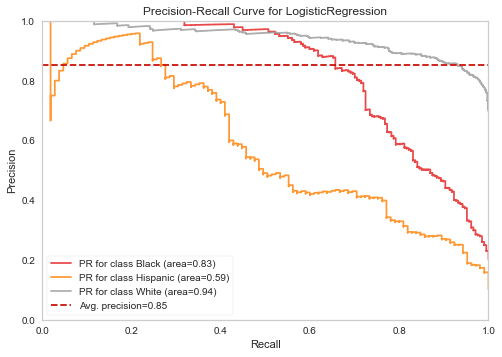

In [194]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations_shap)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes=["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

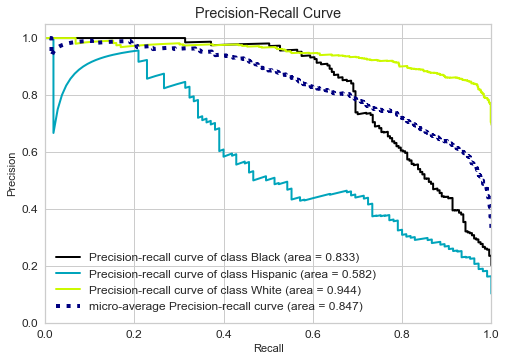

In [195]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)

plot_precision_recall(y_test2, y_pred_proba)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___